# Stepped solution

In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt

## Try at 1.7A (C/2) and reduce tstep after SolverError

In [2]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016()

# Update current and ICs to correspond to initial 2.4V as in ref [2]
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for S8 ion [g]": 2.6730,
        "Initial Condition for S4 ion [g]": 0.0128,
        "Initial Condition for S2 ion [g]": 4.3321e-6,
        "Initial Condition for S ion [g]": 1.6321e-6,
        "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
    }
)

# Set up solver and simulation
solver = pybamm.CasadiSolver(atol=1e-6,rtol=1e-3, mode="fast")
sim = pybamm.Simulation(model, parameter_values=params, solver=solver)

In [3]:
# step solution - will get alot of "psetup failed" warnings from rejected steps!!

tstep = 4000  # going to fix npts = tpts, but not sure this is necessary  
tmin = 10  # minimum step 10s 

while tstep > tmin:
    try:
        solution = sim.step(tstep, npts=int(tstep))
        DC = solution["Discharge capacity [A.h]"].entries
        V = solution["Terminal voltage [V]"].entries
    except pybamm.SolverError:
        tstep = tstep/2

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:827: Calculating Jacobian failed
psetup failed: .../c

In [4]:
timer = pybamm.Timer()
print("Solution time: ", timer.format(sim.solution.solve_time))
print("Final time: ", timer.format(sim.solution.t[-1]))
print("Final discharge capacity: {} Ah".format(DC[-1]))
print("Termination reason: ", sim.solution.termination)

Solution time:  34.202 ms
Final time:  1 hour, 51 minutes, 28 seconds
Final discharge capacity: 3.157986111111111 Ah
Termination reason:  final time


Text(0, 0.5, 'Precipitated sulfur [g]')

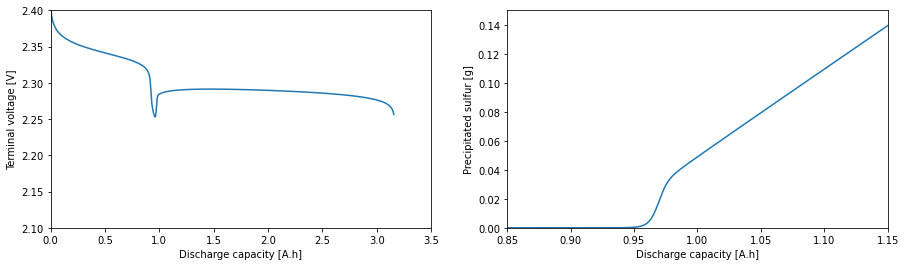

In [5]:
# extract variables and plot
DC = solution["Discharge capacity [A.h]"].entries
V = solution["Terminal voltage [V]"].entries
S = solution["Precipitated Sulfur [g]"].entries

# set up figure 
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].plot(DC, V)  
ax[0].set_xlim([0, 3.5])
ax[0].set_ylim([2.1, 2.4])
ax[0].set_xlabel("Discharge capacity [A.h]")
ax[0].set_ylabel("Terminal voltage [V]")
ax[1].plot(DC, S);  
ax[1].set_xlim([0.85, 1.15])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel("Discharge capacity [A.h]")
ax[1].set_ylabel("Precipitated sulfur [g]")
